# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [86]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [87]:
# 데이터 로드
data = pd.read_csv("abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [88]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [89]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [90]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [92]:
#릿지모델 생성 및 훈련
ridge_reg=Ridge(alpha=0.3, random_state=156)
ridge_reg.fit(X_train, y_train)

#예측값 구하기
pred_ridge=ridge_reg.predict(X_test)

#MSE와 RMSE구하기
mse_ridge=mean_squared_error(y_test, pred_ridge)
rmse_ridge=np.sqrt(mse_ridge)
#구한 예측값을 활용해 최종적으로 전복의 나이 예측
pred_age=pred_ridge+1.5
print(mse_ridge, rmse_ridge)

4.922191459231582 2.2186012393468957


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [93]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [94]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
  ridge_reg=Ridge(alpha=alpha)
  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
  neg_mse_scores=cross_val_score(ridge_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
  avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
  print('alpha {0}일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때 5 folds의 평균 RMSE: 2.194
alpha 0.1일 때 5 folds의 평균 RMSE: 2.193
alpha 1일 때 5 folds의 평균 RMSE: 2.212
alpha 10일 때 5 folds의 평균 RMSE: 2.365
alpha 100일 때 5 folds의 평균 RMSE: 2.625


alpha가 0.1일때 모델 성능이 가장 좋게 나온다.

## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [31]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [34]:
#모델 생성 및 훈련
xgb_reg=XGBRegressor(random_state=156)
xgb_reg.fit(X_train, y_train)
#예측값 구하기
pred_xgb=xgb_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
pred_age_xgb=pred_xgb+1.5

#MSE와 RMSE 구하기
mse_xgb=mean_squared_error(y_test, pred_xgb)
rmse_xgb=np.sqrt(mse_xgb)


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

<Axes: xlabel='None', ylabel='None'>

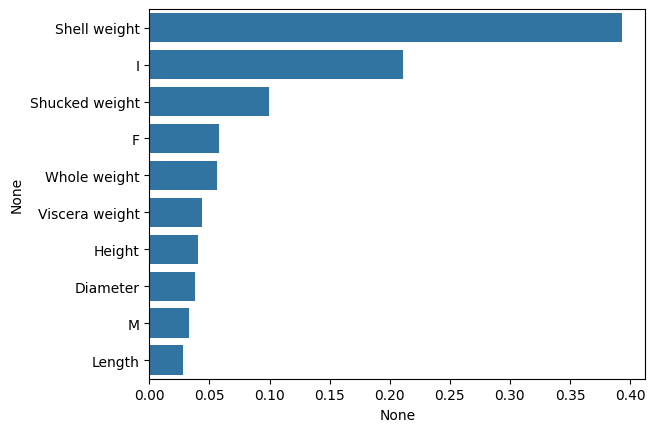

In [35]:
import seaborn as sns
%matplotlib inline

feature_series=pd.Series(data=xgb_reg.feature_importances_, index=data.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [102]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [103]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [104]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3,random_state=42)

x_train.shape
y_train.shape

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [109]:
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression(random_state=42)
lr_clf.fit(x_train, y_train)

LogisticRegression(random_state=42)

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [110]:
#기울기
lr_clf.coef_

array([[-0.28831633,  0.29194239,  0.24201983, -0.26963319, -0.01937353,
         0.31866733,  0.69695615, -0.00932898,  0.07836957,  0.08406336,
        -0.02447768,  0.38432811,  0.0090838 ],
       [ 0.68271387, -0.67577568, -0.26979085,  0.11834042, -0.00644181,
         0.16275781,  0.28935472,  0.04386988,  0.38583955, -1.0801172 ,
         0.2710536 ,  0.40670509, -0.00776151],
       [-0.39439754,  0.3838333 ,  0.02777103,  0.15129277,  0.02581534,
        -0.48142514, -0.98631087, -0.0345409 , -0.46420912,  0.99605384,
        -0.24657592, -0.7910332 , -0.00132229]])

In [111]:
#절편
lr_clf.intercept_

array([-0.07432123,  0.12973815, -0.05541692])

3-3) 모델의 정확도를 구하세요.

In [112]:
#모델의 예측값 구하기
pred_lr=lr_clf.predict(x_test)

#모델의 정확도 구하기
from sklearn.metrics import accuracy_score
lr_clf.score(x_test, y_test)

0.9814814814814815